# Project Scratchpad
# Imports

In [24]:
import csv
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Data
Regarding the data supplied by Udacity...

There are 8037 lines in the driving_log.csv file, including the first row, which is a titles row (title for each column). The IMG directory contains center, left, and right images.

## Read Data from csv File and Verify First Row and Count

In [14]:
samples = []
with open('../data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)
       
print('Number of rows in csv file:',len(samples))
print('The first row of the csv file:\n', samples[0])

Number of rows in csv file: 8037
The first row of the csv file:
 ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']


## Adjust the Dataset File to Exclude Headings (Column Titles)

In [15]:
samples = samples[1:]

print('Number of rows in csv file:',len(samples))
print('The first row of the csv file:\n', samples[0])

Number of rows in csv file: 8036
The first row of the csv file:
 ['IMG/center_2016_12_01_13_30_48_287.jpg', ' IMG/left_2016_12_01_13_30_48_287.jpg', ' IMG/right_2016_12_01_13_30_48_287.jpg', ' 0', ' 0', ' 0', ' 22.14829']


## Collect All Images (Center, Left, Right) and Their Corresponding Angles
Work with just a single row from the csv file.

The left and right camera images will be used to train the model to steer away from the lane's edge by adjusting the steering angle associated with the center image.

In [16]:
# Collect camera images and their corresponding steering angles from the csv file.
images = []
angles = []
# A row from the csv file.
row = samples[0]
# There are three string paths to the center, left, and right camera images.
n_cameras=3
dir_path = '../data/IMG/'
print('Image paths:')
for image_path_index in range(n_cameras):
    image_path = dir_path+row[image_path_index].split('/')[-1]
    print(image_path)
    image = cv2.imread(image_path)
    images.append(image)
    
# There is a steering angle correction for the left and right camera images.
# This correction will be used when training the net to steer away from the lane's edge,
# rather than using the steering angle associated with the center image, which is the
# angle in the csv file.
correction=0.2
angle = float(row[3])
angles.append(angle)
angles.append(angle+correction) # left image
angles.append(angle-correction) # right image

print()
print('Data Metadata:')
print('Number of images collected:',len(images))
print('Number of steering angles collected:',len(angles))

Image paths:
../data/IMG/center_2016_12_01_13_30_48_287.jpg
../data/IMG/left_2016_12_01_13_30_48_287.jpg
../data/IMG/right_2016_12_01_13_30_48_287.jpg

Data Metadata:
Number of images collected: 3
Number of steering angles collected: 3


## Augment the Collected Data
By flipping images and steering angles the data will be more balanced. Track One has just one right turn in it; flipping will be as though the flipped data has just one left turn in it.

**Using data from three cameras and flipping that data will results in six data entries for each row in the csv file.**

In [17]:
# Collect camera images and their corresponding steering angles from the
# orginal data and the flipped data.
augmented_images = []
augmented_angles = []
for image, angle in zip(images, angles):
    augmented_images.append(image)
    augmented_angles.append(angle)
    # Flip the image data to simulate CW turns where the track is all CCW turns.
    # 1 specifies flipping about the vertical axis rather than the horizontal.
    flipped_image = cv2.flip(image, 1)
    flipped_angle = angle * -1.0
    augmented_images.append(flipped_image)
    augmented_angles.append(flipped_angle)
  
print('Data Post Augmentation Metadata:')
print('Number of images:',len(augmented_images))
print('Number of steering angles:',len(augmented_angles))

Data Post Augmentation Metadata:
Number of images: 6
Number of steering angles: 6


Resize Image

Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
lambda_1 (Lambda)                (None, 66, 200, 3)    0           input_1[0][0]                    
Total params: 0
Trainable params: 0
Non-trainable params: 0
____________________________________________________________________________________________________


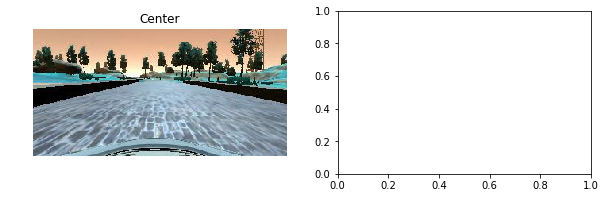

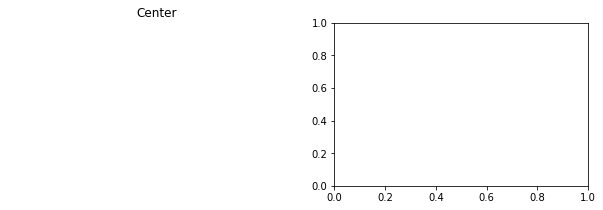

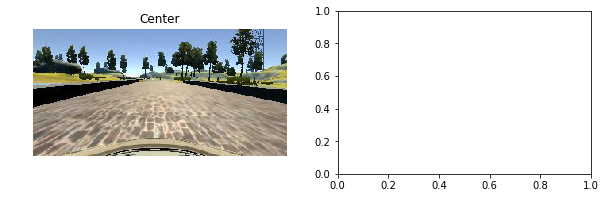

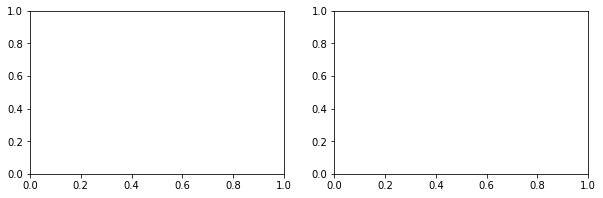

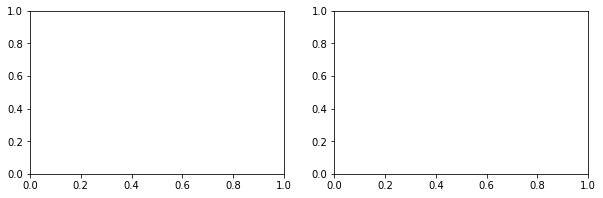

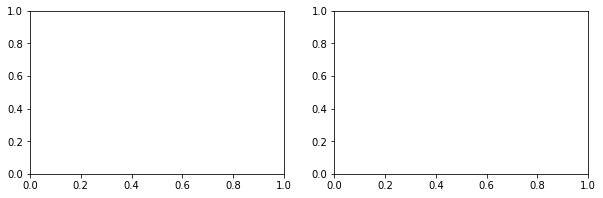

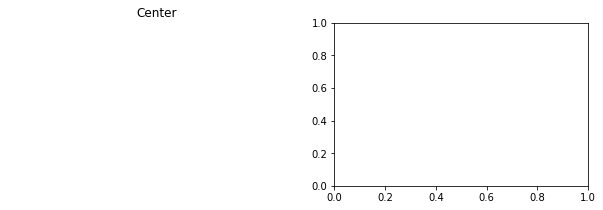

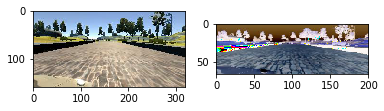

In [18]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

from keras.layers import Lambda, Input
from keras.models import Model
from keras.backend import tf as ktf


# 3 channel images of arbitrary shape
inp = Input(shape=(None, None, 3))
try:
    out = Lambda(lambda image: ktf.image.resize_images(image, (66, 200)))(inp)
except :
    # if you have older version of tensorflow
    out = Lambda(lambda image: ktf.image.resize_images(image, 66, 200))(inp)

model = Model(input=inp, output=out)
model.summary()

X = scipy.ndimage.imread(image_path)

out = model.predict(X[np.newaxis, ...])

fig, Axes = plt.subplots(nrows=1, ncols=2)
Axes[0].imshow(X)
Axes[1].imshow(np.int8(out[0,...]))

plt.show()


Center, Left, and Right Images


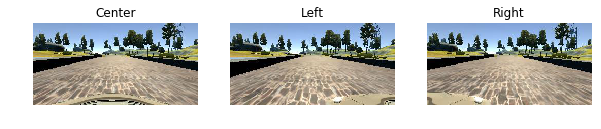

In [30]:
center_image_path='../data/IMG/center_2016_12_01_13_30_48_287.jpg'
left_image_path='../data/IMG/left_2016_12_01_13_30_48_287.jpg'
right_image_path='../data/IMG/right_2016_12_01_13_30_48_287.jpg'

# Plot
fig, axs = plt.subplots(1,3, figsize=(10, 3))
axs = axs.ravel()

center_image = cv2.imread(center_image_path)
axs[0].axis('off')
axs[0].set_title('Center')
axs[0].imshow(cv2.cvtColor(center_image, cv2.COLOR_BGR2RGB))

left_image = cv2.imread(left_image_path)
axs[1].axis('off')
axs[1].set_title('Left')
axs[1].imshow(cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB))

right_image = cv2.imread(right_image_path)
axs[2].axis('off')
axs[2].set_title('Right')
axs[2].imshow(cv2.cvtColor(right_image, cv2.COLOR_BGR2RGB))

print()
print('Center, Left, and Right Images')


Flipped Center, Left, and Right Images


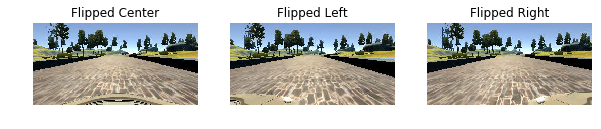

In [32]:
flipped_center_image = cv2.flip(center_image, 1)
flipped_left_image = cv2.flip(left_image, 1)
flipped_right_image = cv2.flip(right_image, 1)

# Plot
fig, axs = plt.subplots(1,3, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('Flipped Center')
axs[0].imshow(cv2.cvtColor(flipped_center_image, cv2.COLOR_BGR2RGB))

axs[1].axis('off')
axs[1].set_title('Flipped Left')
axs[1].imshow(cv2.cvtColor(flipped_left_image, cv2.COLOR_BGR2RGB))

axs[2].axis('off')
axs[2].set_title('Flipped Right')
axs[2].imshow(cv2.cvtColor(flipped_right_image, cv2.COLOR_BGR2RGB))

print()
print('Flipped Center, Left, and Right Images')

center_image.shape: (160, 320, 3)

Cropped Center, Left, and Right Images


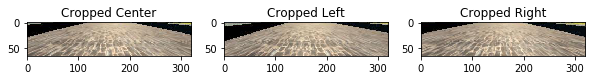

In [56]:
# [y:h, x:w]
print('center_image.shape:',center_image.shape)

cropped_center_image = center_image[70:135, 0:320]
cropped_left_image = left_image[70:135, 0:320]
cropped_right_image = right_image[70:135, 0:320]

# Plot
fig, axs = plt.subplots(1,3, figsize=(10, 3))
axs = axs.ravel()

# axs[0].axis('off')
axs[0].set_title('Cropped Center')
axs[0].imshow(cv2.cvtColor(cropped_center_image, cv2.COLOR_BGR2RGB))

# axs[1].axis('off')
axs[1].set_title('Cropped Left')
axs[1].imshow(cv2.cvtColor(cropped_left_image, cv2.COLOR_BGR2RGB))

# axs[2].axis('off')
axs[2].set_title('Cropped Right')
axs[2].imshow(cv2.cvtColor(cropped_right_image, cv2.COLOR_BGR2RGB))

print()
print('Cropped Center, Left, and Right Images')


Resized Center, Left, and Right Images


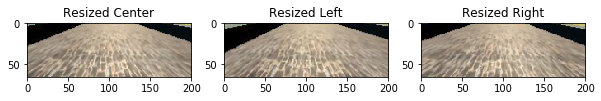

In [55]:
resized_center_image = cv2.resize(cropped_center_image, (200,66), interpolation = cv2.INTER_AREA)
resized_left_image = cv2.resize(cropped_left_image, (200,66), interpolation = cv2.INTER_AREA)
resized_right_image = cv2.resize(cropped_right_image, (200,66), interpolation = cv2.INTER_AREA)

# Plot
fig, axs = plt.subplots(1,3, figsize=(10, 3))
axs = axs.ravel()

# axs[0].axis('off')
axs[0].set_title('Resized Center')
axs[0].imshow(cv2.cvtColor(resized_center_image, cv2.COLOR_BGR2RGB))

# axs[1].axis('off')
axs[1].set_title('Resized Left')
axs[1].imshow(cv2.cvtColor(resized_left_image, cv2.COLOR_BGR2RGB))

# axs[2].axis('off')
axs[2].set_title('Resized Right')
axs[2].imshow(cv2.cvtColor(resized_right_image, cv2.COLOR_BGR2RGB))

print()
print('Resized Center, Left, and Right Images')